<p style="font-size: 22pt; color: green; font-family: 'Times New Roman';">
 notebook to Explore Conditional Probability using FACTS output <br>
 <span style="font-size: 12pt; color: black;"> by Praveen Kumar and Bob Kopp </span>
</p>

<hr style="border: none; height: 2px; background-color: blue; border-style: dotted;">

In [1]:
import os
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
from IPython.display import display, Image, HTML, Video
import cond_dist as cd

Projecting sea level requires integrating contributions from Ice sheets, glaciers, ocean models, and population dynamics, accounting for emissions.  

These frameworks exist mainly as Earth System Models, however, 
1. they are computationally demanding. 
1. often only offer single deterministic projections. 

_A complementary approach_ involves using emulators, Framework for Assessing Changes To Sea-level (**FACTS**) can be thought of as an emulator-based approach for probabilistic projections of sea-level. 
- an assessment tool to help users understand how sea levels could respond to future climate variability.
- open-source sea-level projection software library.
- It is designed to emulate detailed, process-based analyses of individual sea-level contributions and coupled projections made with Earth System Models.

Within FACTS, Relative SL is obtained by aggregating probability distributions from individual drivers, including ice sheets, glaciers, land water storage, and sterodynamic processes.

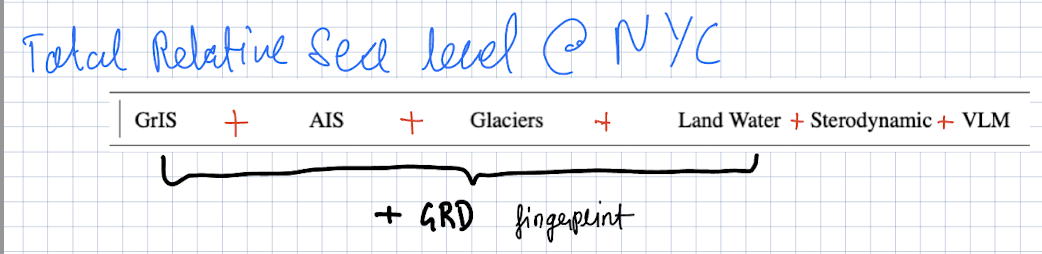

In [2]:
display(Image('./_IP_fig/RSL.png'))

- **Sterodynamic** sea level is estimated based on the correlation between thermal expansion (derived from GSAT and OHC; FaIR) and local dynamic sea level in the CMIP6 multimodel ensemble.
- **VLM** long-term contributions from vertical land motion 

<hr style="border: none; height: 2px; background-color: blue; border-style: dotted;">

**FACTS can be run conditional upon specified modeling assumptions.**
and each assumption is called a workflow


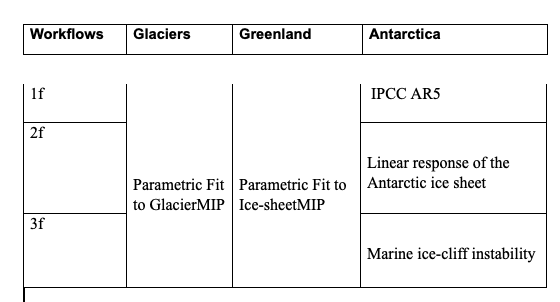

In [3]:
display(Image('./_IP_fig/workflow.png'))

<hr style="border: none; height: 2px; background-color: blue; border-style: dotted;">
<span style="font-family: 'Times New Roman'; font-size: 16pt; color: blue;">
    Read Data:: <span style="font-size: 8pt; color: black;"> <i>FACTS 1.1.1</i></span>
</span>


In [4]:
path = os.path.expanduser(f'~/werk.M2/0000_facts-OPdata.M2/amarel/ar2208/factsv1.1.1/coupling.ssp245/output/')

# !-----------------------------------------------------------------!
Yr1=2030 # Xaxis (Vary ; 2030component)
dat1a='coupling.ssp245.total.workflow.wf2f.local.nc'
dat1b='coupling.ssp245.total.workflow.wf2f.global.nc'
dat1c='coupling.ssp245.ocean.tlm.sterodynamics_globalsl.nc'
dat1d='coupling.ssp245.ocean.tlm.sterodynamics_localsl.nc'
dat1e='coupling.ssp245.larmip.larmip.AIS_globalsl.nc'

# !---!
Yr2=2100 # Yaxis (fixed ; NYC RSL 2100)
dat2='coupling.ssp245.total.workflow.wf2f.local.nc' 

# !-----------------------------------------------------------------!
INdata1a, datNMEa  = cd.prepData(path, dat1a, dat2, Yr1, Yr2)
INdata1b, datNMEb  = cd.prepData(path, dat1b, dat2, Yr1, Yr2)
INdata1c, datNMEc  = cd.prepData(path, dat1c, dat2, Yr1, Yr2)
INdata1d, datNMEd  = cd.prepData(path, dat1d, dat2, Yr1, Yr2)
INdata1e, datNMEe  = cd.prepData(path, dat1e, dat2, Yr1, Yr2)
print('... Done')

... Done


<hr style="border: none; height: 2px; background-color: red; border-style: dotted;">
<span style="font-family: 'Times New Roman'; font-size: 16pt; color: red;">
    NYC total SL in 2100 conditional on
</span>
<ol style="font-family: 'Times New Roman'; font-size: 16pt; color: red;">
    <li>2030 RSL observations TOTAL </li>
    <li>2030 GMSL observation TOTAL </li>
    <li>2030 Thermal Expansion</li>
    <li>2030 Sterodynamic observations</li>
    <li>2030 AIS component</li>
</ol>

<hr style="position: absolute; left: 1.5; width: 50%; height: 2px; background-color: blue; border-style: solid;"><br>
<span style="font-family: 'Times New Roman'; font-size: 16pt; color: blue;">
    Plot:: raw data / samples
</span>


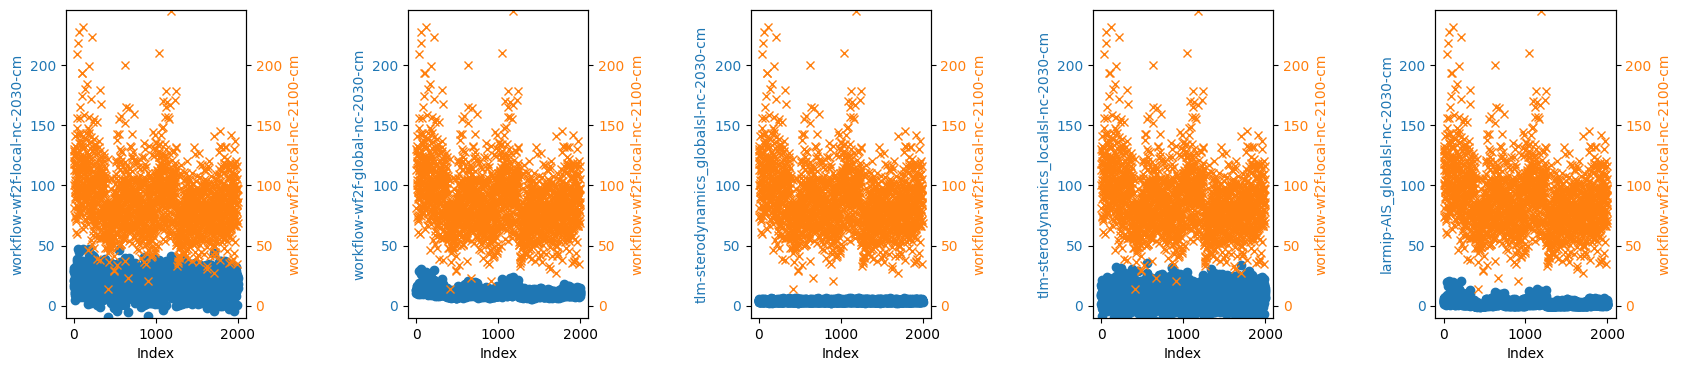

In [5]:
cd.PLOTraw([INdata1a,INdata1b,INdata1c,INdata1d,INdata1e],
           [datNMEa,datNMEb,datNMEc,datNMEd,datNMEe])

<hr style="position: absolute; left: 1.5; width: 50%; height: 2px; background-color: blue; border-style: solid;"><br>
<span style="font-family: 'Times New Roman'; font-size: 16pt; color: blue;">
    Plot:: Scatter
</span>

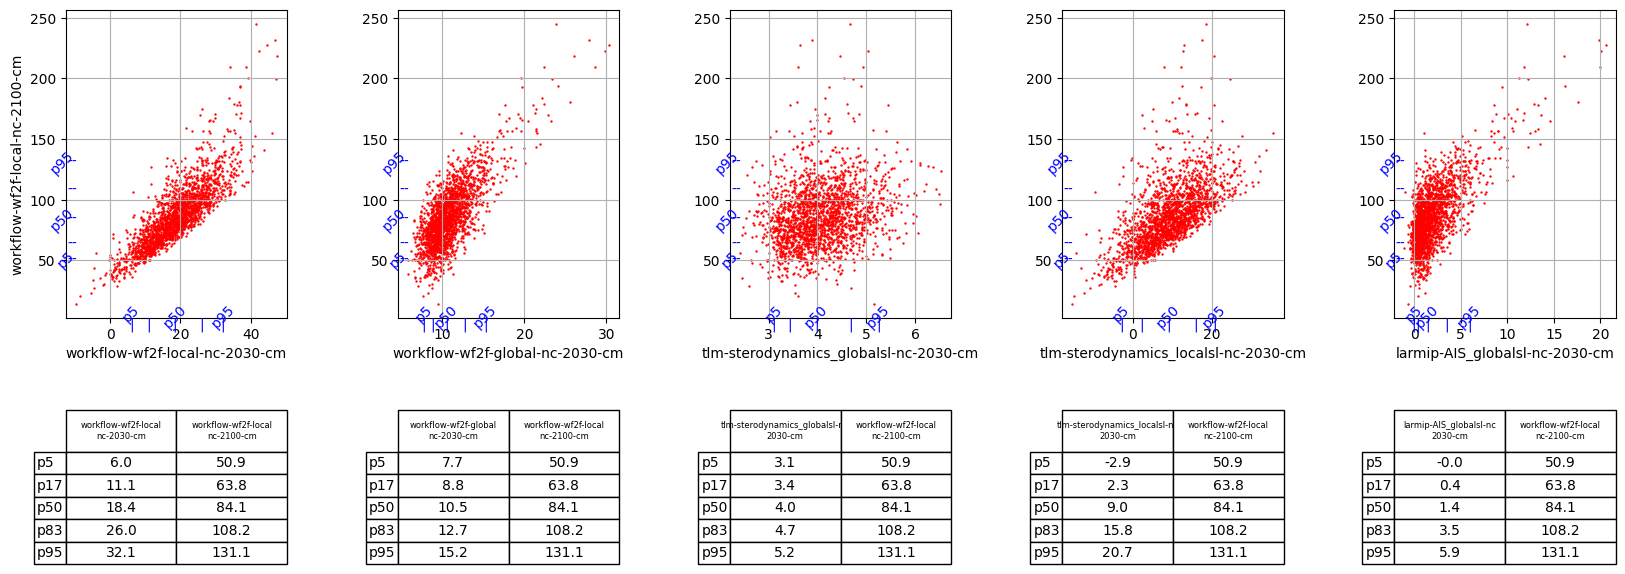

In [6]:
cd.PLOTscatter([INdata1a,INdata1b,INdata1c,INdata1d,INdata1e],
               [datNMEa,datNMEb,datNMEc,datNMEd,datNMEe])

<hr style="position: absolute; left: 1.5; width: 50%; height: 2px; background-color: blue; border-style: solid;"><br>
<span style="font-family: 'Times New Roman'; font-size: 16pt; color: blue;">
    Compute:: KDE
</span>

<p> KDE estimates the joint probability density function 
𝑃(𝑋,𝑌) for the data. <br>
When you evaluate KDE on a grid of X and Y values, you get a matrix where each element represents the joint density at that specific (X, Y) point.<br>  
density_values: This is the joint density estimate 𝑃 ( 𝑋 , 𝑌 ) , computed by evaluating the KDE on the entire grid of (Xgrid, Ygrid) points.<br>  
After normalization, each column represents a probability distribution over Y, given a fixed X:<br>  
normalized_density_values represents the entire conditional distribution matrix 𝑃 ( 𝑌 ∣ 𝑋 ) over all evaluated X values.<br>
</p>


In [7]:
normalized_density_values1a, density_values1a, xgrid1a, ygrid1a, xp1a, yp1a = cd.COMPkde(INdata1a,print=0);
normalized_density_values1b, density_values1b, xgrid1b, ygrid1b, xp1b, yp1b = cd.COMPkde(INdata1b,print=0);
normalized_density_values1c, density_values1c, xgrid1c, ygrid1c, xp1c, yp1c = cd.COMPkde(INdata1c,print=0);
normalized_density_values1d, density_values1d, xgrid1d, ygrid1d, xp1d, yp1d = cd.COMPkde(INdata1d,print=0);
normalized_density_values1e, density_values1e, xgrid1e, ygrid1e, xp1e, yp1e = cd.COMPkde(INdata1e,print=0);

<br>
<span style="font-family: 'Times New Roman'; font-size: 16pt; color: blue;">
    PLOT:: KDE
</span>

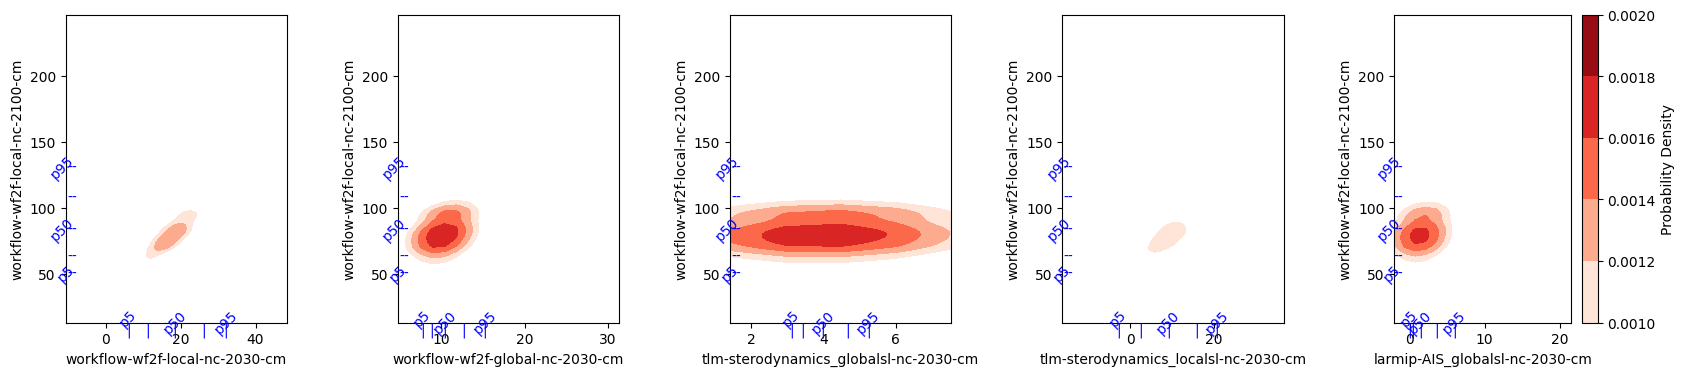

In [8]:
import cond_dist as cd
cd.PLOTkde([density_values1a, density_values1b, density_values1c, density_values1d, density_values1e], 
           [xgrid1a, xgrid1b, xgrid1c, xgrid1d, xgrid1e], 
           [ygrid1a, ygrid1b, ygrid1c, ygrid1d, ygrid1e],
           [xp1a, xp1b, xp1c, xp1d, xp1e],
           [yp1a,yp1b,yp1c,yp1d,yp1e],
           [datNMEa,datNMEb,datNMEc,datNMEd,datNMEe], 
            np.linspace(0.001, 0.002, 6))

<br>
<span style="font-family: 'Times New Roman'; font-size: 16pt; color: blue;">
    PLOT:: normalized KDE (conditional distributions.)
</span>

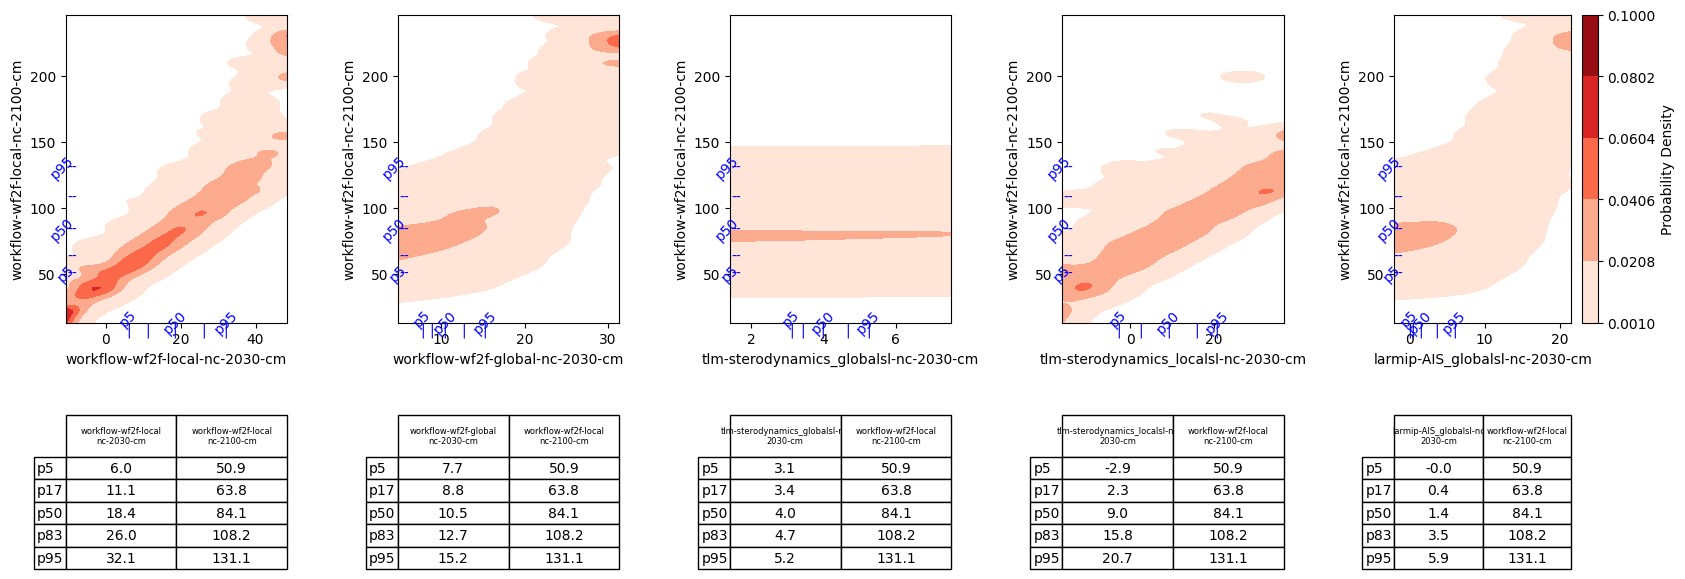

In [9]:
import cond_dist as cd
cd.PLOTkde([normalized_density_values1a, normalized_density_values1b, normalized_density_values1c, normalized_density_values1d, normalized_density_values1e], 
           [xgrid1a, xgrid1b, xgrid1c, xgrid1d, xgrid1e], 
           [ygrid1a, ygrid1b, ygrid1c, ygrid1d, ygrid1e],
           [xp1a, xp1b, xp1c, xp1d, xp1e],
           [yp1a,yp1b,yp1c,yp1d,yp1e],
           [datNMEa,datNMEb,datNMEc,datNMEd,datNMEe], 
           np.linspace(0.001, 0.1, 6),
           table=1)

* percentiles are calculated from the original distribution. 

In [10]:
# column_sums = np.sum(normalized_density_values1c, axis=0)
# plt.plot(column_sums,'.',markersize=.25,color='black')
# plt.ylim(0.999, 1.001)
# print('Check the normalization by summing.')

<hr style="position: absolute; left: 1.5; width: 50%; height: 2px; background-color: blue; border-style: solid;"><br>
<span style="font-family: 'Times New Roman'; font-size: 16pt; color: blue;">
    Plot:: Constrain to percentile values. 
</span>
<p span style="font-family: 'Times New Roman'; font-size: 10pt; color: green;">Plot conditional distribution for specific X (5-95 percentile) .</p>

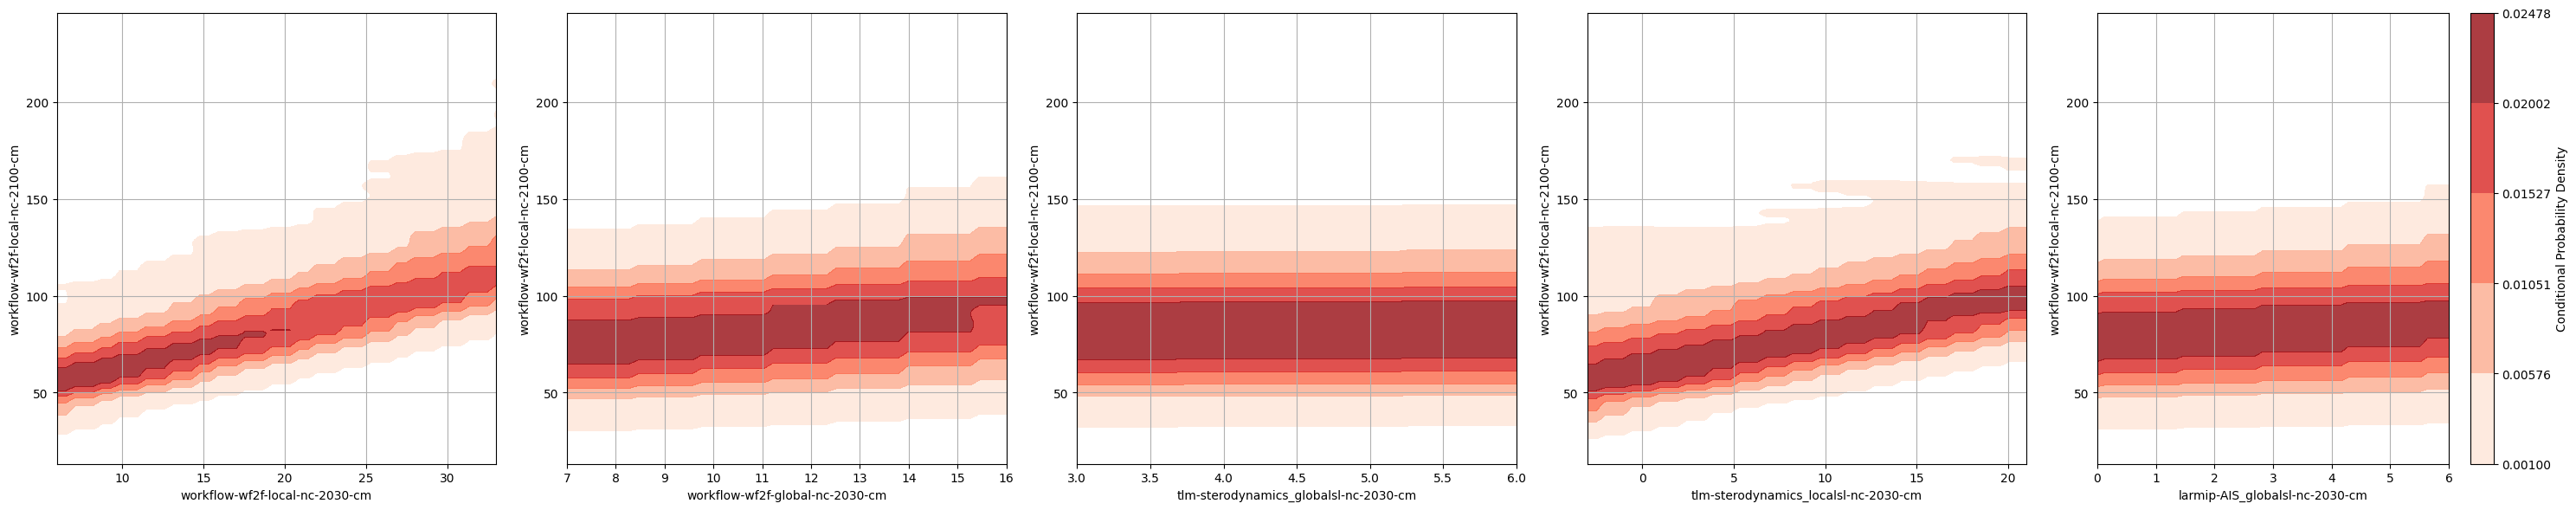

In [11]:
x_values = [(6, 33, 50), (7, 16, 50), (3, 6, 50), (-3, 21, 50), (0, 6, 50)]
# y_limits = [(50, 131), (51, 131), (51, 131), (51, 131), (51, 131)]

cd.PLOTcondProb([density_values1a, density_values1b, density_values1c, density_values1d, density_values1e], 
           [xgrid1a, xgrid1b, xgrid1c, xgrid1d, xgrid1e], 
           [ygrid1a, ygrid1b, ygrid1c, ygrid1d, ygrid1e],
           [datNMEa,datNMEb,datNMEc,datNMEd,datNMEe],
           x_values)

<hr style="position: absolute; left: 1.5; width: 50%; height: 2px; background-color: blue; border-style: solid;"><br>
<span style="font-family: 'Times New Roman'; font-size: 16pt; color: blue;">
    Quick task
</span>

1. In the above `constrained uncertainty` plot, add  contours to show the 17,83 percentile of the normalized Y-values. 
1. In the Normalized plots,  table include a new Y-column for KDE y-value percentiles for the corresponding percentiles.
1. Sanity check for the original KDE (density light in some plots). Check if the KDE percentiles and the original percentiles are same.
1. Write down the paper key figures and outline text. 

---
For refining presentation of the plots,
1. Change the background of the above `constrained uncertainty` to be the original KDE.
  - Add violin for the constrained percentile

_Notibility has notes, meeting with Bob on 10/31/2024_

---

<div style="position: relative; width: 100%;">
    <hr style="position: absolute; left: 0; width: 50%; border: none; height: 2px; background-color: yellow; border-style: dotted;">
</div>
<span style="font-size: 12pt; color: blue; font-family: 'Times New Roman';"> SCRATCH </span>  

<br><br><br><br>